# Explore here

# Pip & Requirements

In [4]:
pip install -r /workspaces/interacting-with-api-python-project-tutorial/requirements.txt

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
! pip install spotipy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 8.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# All Imports

In [5]:
import os
from sqlalchemy import create_engine
import pandas as pd
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt



In [6]:
# load the .env file variables
load_dotenv()

client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

In [7]:
con = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))


In [8]:
korn_id = "3RNrq3jvMZxD9ZyoOZbQOD"

songs=[]
response = con.artist_top_tracks(korn_id)
if response:
    for track in response['tracks']:
        tracks = {}
        tracks['name'] = track['name']
        tracks['popularity'] = track['popularity']
        tracks['duration'] = track['duration_ms']/60000
        songs.append(tracks)
songs_df = pd.DataFrame(songs)
songs_df

,name,popularity,duration
0,Freak On a Leash,79,4.262217
1,Coming Undone,78,3.329550
2,Falling Away from Me,75,4.515333
3,Got the Life,74,3.755100
4,Blind - Live at CBGB,65,4.206667
5,Twisted Transistor,72,3.148883
6,Y'all Want a Single,64,3.298433
7,Here to Stay,67,4.516000
8,Word Up!,69,2.877767
9,Twist,68,0.820217


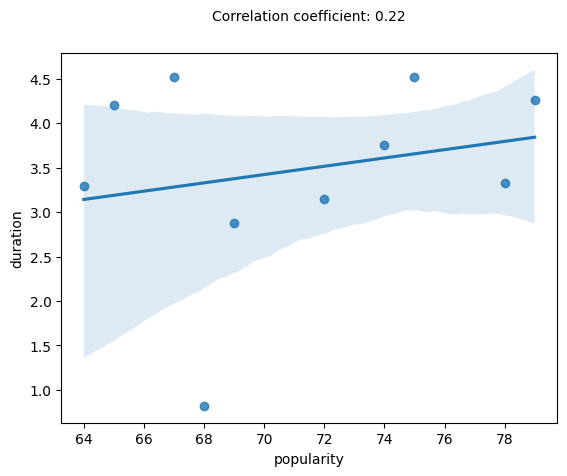

In [13]:
corr_coef = songs_df['popularity'].corr(songs_df['duration'])
# Create the scatter plot with correlation coefficient and linear regression line
scatter_plot = sns.regplot(data=songs_df, x="popularity", y="duration")
scatter_plot.text(0.5, 1.1, f"Correlation coefficient: {corr_coef:.2f}", ha="center", va="center", transform=scatter_plot.transAxes)

# Save the scatter plot as "scatter_plot.png"
plt.savefig("scatter_plot.png")

plt.show() 